In [127]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [128]:
labels_2hop_all = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6',
               'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']
labels_2hop_3 = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
labels_2hop_4 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']

labels_gr_all = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6',
                '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
                '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']
labels_gr_4 = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']
labels_gr_5 = ['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
               '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']


In [129]:
def load_json_convert(filepath):
    with open(f'./{filepath}/output.json') as f:
        real = json.load(f)

    with open(f'./{filepath}/random_output.json') as f:
        random = json.load(f)
    
    real = pd.DataFrame(real)
    real['domain'] = real['dataset'].str.split('-').str[0]
    random = pd.DataFrame(random)
    random['domain'] = random['dataset'].str.split('-').str[0]
    
    return real, random

In [118]:
def sig_profile(real, random, label, datasets, domain = "all"):
        
    # Prepare for plotting
    plt.figure(figsize=(10, 8))

    srp_data = []
    
    if domain != "all":
        real = real[real['domain'] == domain]
        random = random[random['domain'] == domain]
            
    for data in datasets:
        print(data)
        real_data = real[real['dataset'] == data][label]
        random_data = random[random['dataset'] == data][label]

        # Compute Delta_i for each subgraph
        epsilon = 1
        delta_i = {}
        for key in list(real_data):
            N_real_i = real_data[key].values
            N_rand_i = random_data[key].values
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = [delta / np.sqrt(sum_delta_squared) for delta in delta_i.values()]

        srp_data.append(srp_i)

        # Plot the Subgraph Ratio Profile
        plt.plot(label, srp_i, marker='o', label=f'{data}')

    if domain == "all":
        df = pd.DataFrame(srp_data, index = datasets).T
        correlation_matrix = df.corr(method='pearson')
    else:
        correlation_matrix = None

    # Plot settings
    plt.xlabel('2Hoplets Index')
    plt.ylabel('Normalized Significance Profile Score')
    plt.title(f'{domain} datasets')
    plt.ylim(-0.5, 0.5)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.xticks(rotation=45)

    # num_labels_to_show = 8
    # step = len(labels) // (num_labels_to_show - 1)
    # visible_positions = list(range(0, len(labels), step))[:num_labels_to_show]
    # visible_labels = [labels[i] for i in visible_positions]
    # plt.xticks(visible_positions, visible_labels)


    # Save the plot
    # filename = f'{domain}_extend_3.png'
    # plt.savefig(f'./figure/{filename}')

    # Display the plot
    plt.show()
    return correlation_matrix, srp_data

In [132]:
def conf_mat(labels, correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='YlOrBr', cbar=True, square=True, vmin=-0.1, vmax=1)
    plt.title('Correlation Coefficient Matrix')
    plt.xlabel('Datasets')
    plt.ylabel('Datasets')
    # Add custom colored labels
    ax = plt.gca()
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90, ha='right', rotation_mode='anchor')
    ax.set_yticklabels(labels, rotation=0)
    #ax.set_xticklabels([''] * len(labels))
    #ax.set_yticklabels([''] * len(labels))
    plt.show()

### For Each Domain

In [159]:
datasets = [
            'ca-dblp-2012', 'ca-CondMat', 'ca-HepTh', #'ca-dblp-2012',
            'web-arabic-2005', 'web-indochina-2004', 'web-sk-2005', 'web-webbase', 'web-polblogs',  'web-EPA',  'web-edu',  'web-NotreDame',
            #'email-univ','email-Enron', #'email-EU',
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45', #'socfb-UC64', 'socfb-UCSC68',
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            ]
real, random = load_json_convert("original_output")

In [160]:
domain = real[real['dataset'] == 'datasets']['domain']
#corr = sig_profile(real, random, labels_2hop_4, datasets, domain='ca')

ca-dblp-2012
ca-CondMat
ca-HepTh
web-arabic-2005
web-webbase
web-polblogs
web-EPA
web-edu
web-NotreDame
socfb-Haverford76
socfb-Hamilton46
socfb-Middlebury45
tags-ask-ubuntu
tags-math-sx
roadNet-CA
roadNet-TX
roadNet-PA


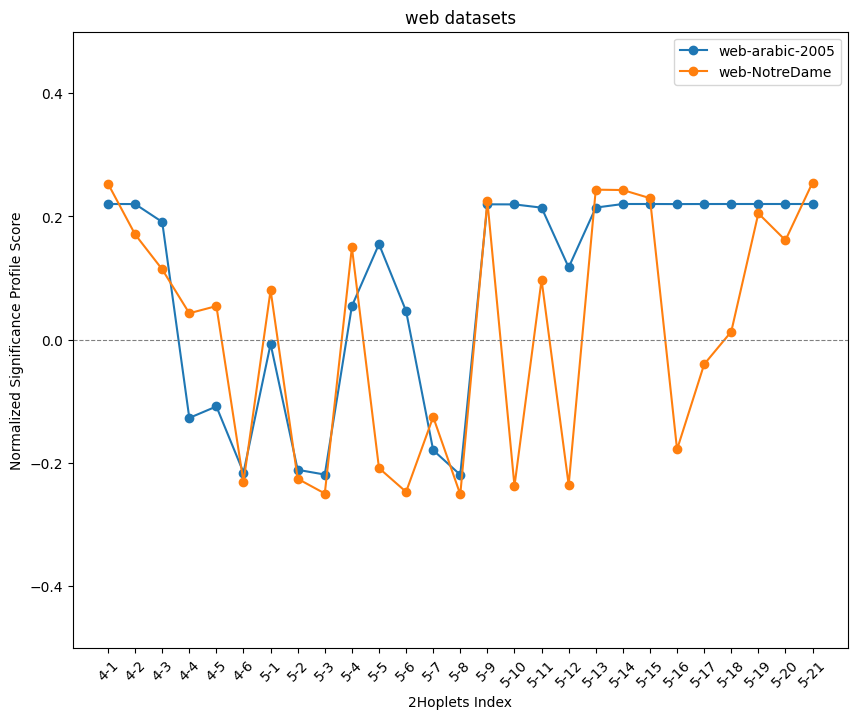

In [161]:
corr = sig_profile(real, random, labels_gr_all, datasets, domain='web')

ca-dblp-2012
ca-CondMat
ca-HepTh
web-arabic-2005
web-indochina-2004
socfb-Haverford76
socfb-Hamilton46
socfb-Middlebury45
tags-ask-ubuntu
tags-math-sx
roadNet-CA
roadNet-TX
roadNet-PA


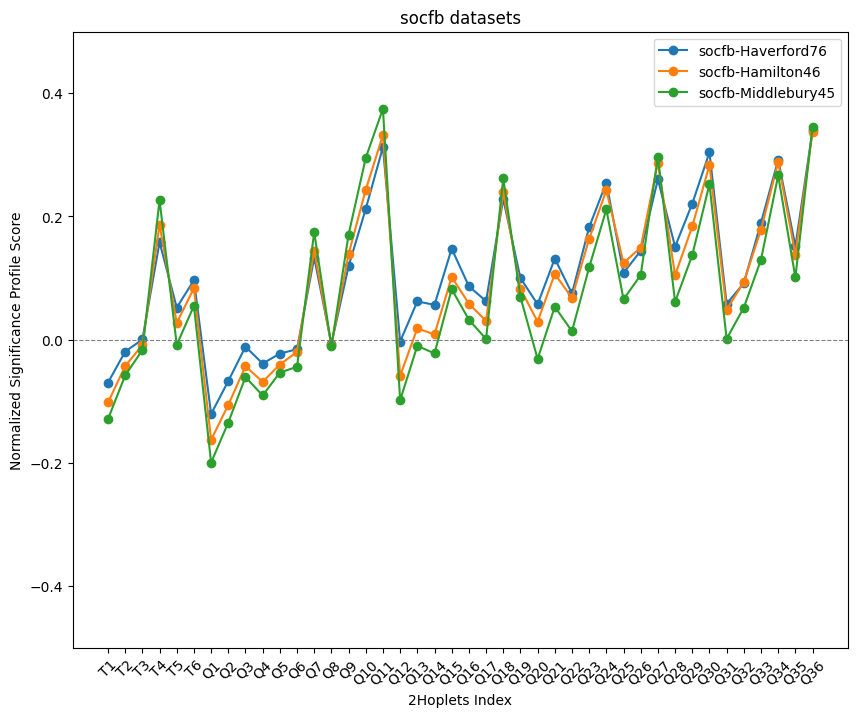

In [111]:
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='socfb')

### Total

ca-HepPh
ca-GrQc
ca-netscience
ca-AstroPh
socfb-Middlebury45
socfb-Hamilton46
socfb-Haverford76
tags-ask-ubuntu
tags-math-sx
roadNet-CA
roadNet-TX
roadNet-PA


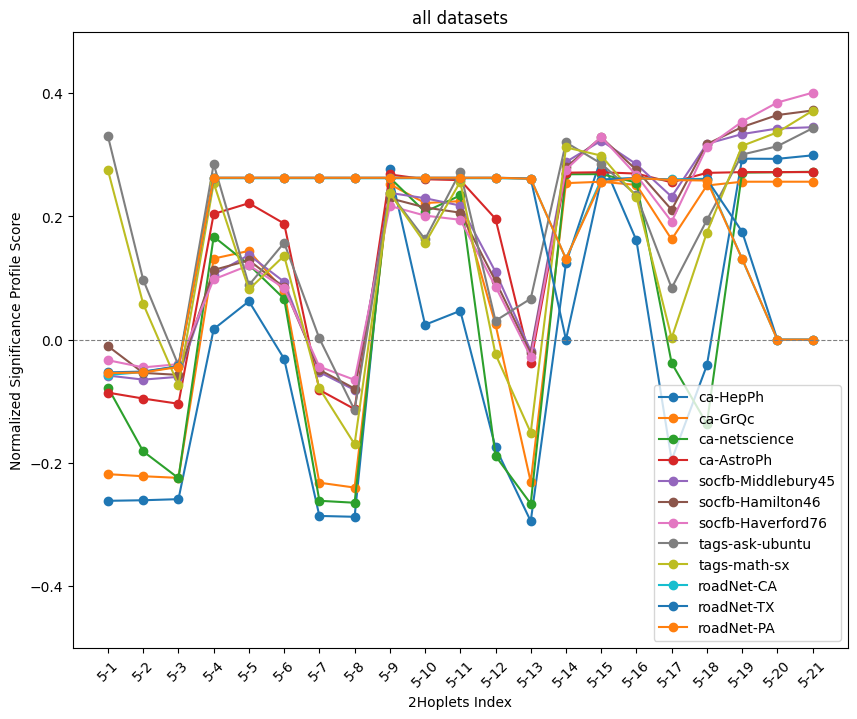

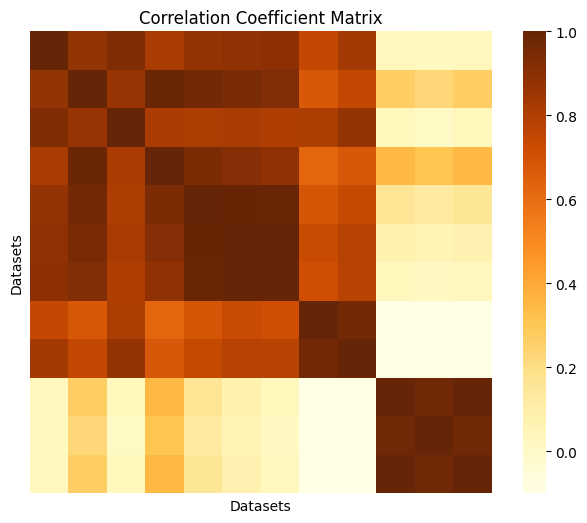

In [211]:
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-netscience', 'ca-AstroPh',
            
            #'socfb-UC64', 'socfb-UCSC68',
            #'ca-Erdos992',  'ca-dblp-2012', 'ca-MathSciNet', 'ca-HepTh''ca-CondMat', 
            'socfb-Middlebury45', 'socfb-Hamilton46', 'socfb-Haverford76', 
            #'web-arabic-2005', 'web-indochina-2004', #'web-NotreDame', 'web-Stanford',
            'tags-ask-ubuntu', 'tags-math-sx',
            
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA', 
            
            
            
            
             #'email-univ','email-Enron', #'email-EU',       
            
            
            ]
real, random = load_json_convert("original_output")
domain = real[real['dataset'] == 'datasets']['domain']
corr_mat, srp = sig_profile(real, random, labels_gr_5, datasets)
conf_mat(domain, corr_mat)

In [207]:
corr_mat

,ca-HepPh,ca-GrQc,ca-netscience,ca-AstroPh,socfb-Middlebury45,socfb-Hamilton46,socfb-Haverford76,tags-ask-ubuntu,tags-math-sx,roadNet-CA,roadNet-TX
ca-HepPh,1.000000,0.937952,0.886232,0.945961,0.593483,0.458707,0.379066,0.570717,0.721250,0.377554,0.376538
ca-GrQc,0.937952,1.000000,0.962644,0.954830,0.396124,0.250403,0.171465,0.658641,0.741291,0.460280,0.459589
ca-netscience,0.886232,0.962644,1.000000,0.903705,0.270639,0.131206,0.051895,0.732023,0.797282,0.411104,0.410785
ca-AstroPh,0.945961,0.954830,0.903705,1.000000,0.479261,0.327482,0.229376,0.664286,0.781283,0.434262,0.433516
socfb-Middlebury45,0.593483,0.396124,0.270639,0.479261,1.000000,0.981504,0.954318,-0.185694,0.091391,0.042304,0.040481
socfb-Hamilton46,0.458707,0.250403,0.131206,0.327482,0.981504,1.000000,0.986890,-0.328055,-0.048153,-0.043719,-0.045581
socfb-Haverford76,0.379066,0.171465,0.051895,0.229376,0.954318,0.986890,1.000000,-0.422408,-0.146206,-0.017242,-0.019128
tags-ask-ubuntu,0.570717,0.658641,0.732023,0.664286,-0.185694,-0.328055,-0.422408,1.000000,0.927124,0.251195,0.251440
tags-math-sx,0.721250,0.741291,0.797282,0.781283,0.091391,-0.048153,-0.146206,0.927124,1.000000,0.187768,0.187438
roadNet-CA,0.377554,0.460280,0.411104,0.434262,0.042304,-0.043719,-0.017242,0.251195,0.187768,1.000000,0.999991


In [198]:
import numpy as np

X = np.array(srp)
X = X.reshape(10, 36).T

ValueError: cannot reshape array of size 432 into shape (10,36)

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# X는 n개의 샘플과 36차원의 벡터로 이루어진 데이터
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA 모델을 주성분 개수를 지정하여 생성
pca = PCA(n_components=10)  # 예: 2개의 주성분으로 차원을 축소
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)  # 각 주성분이 설명하는 분산 비율
# 각 주성분이 원본 데이터의 몇 번째 차원에 해당하는지 확인
most_influential_dimensions = np.argmax(np.abs(pca.components_), axis=1)

# 출력
for i, dim in enumerate(most_influential_dimensions):
    print(f"주성분 {i + 1}은(는) 원래 데이터의 {dim + 1}번째 차원에 가장 큰 영향을 받음")
    
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [70]:
corr_mat

,ca-CondMat,ca-HepTh,ca-dblp-2012,web-arabic-2005,web-indochina-2004,socfb-Haverford76,socfb-Hamilton46,socfb-Middlebury45,tags-ask-ubuntu,tags-math-sx
ca-CondMat,1.000000,0.998350,0.984493,0.893095,0.991231,0.336529,0.417645,0.538815,0.651512,0.778382
ca-HepTh,0.998350,1.000000,0.991437,0.878898,0.987111,0.335653,0.411785,0.528071,0.617423,0.744620
ca-dblp-2012,0.984493,0.991437,1.000000,0.812750,0.958372,0.255648,0.326268,0.439305,0.577359,0.678643
web-arabic-2005,0.893095,0.878898,0.812750,1.000000,0.937881,0.527759,0.606811,0.716075,0.663296,0.835385
web-indochina-2004,0.991231,0.987111,0.958372,0.937881,1.000000,0.427245,0.507599,0.624512,0.654206,0.809895
socfb-Haverford76,0.336529,0.335653,0.255648,0.527759,0.427245,1.000000,0.992272,0.958309,-0.135905,0.252801
socfb-Hamilton46,0.417645,0.411785,0.326268,0.606811,0.507599,0.992272,1.000000,0.985962,-0.017414,0.367597
socfb-Middlebury45,0.538815,0.528071,0.439305,0.716075,0.624512,0.958309,0.985962,1.000000,0.144805,0.514211
tags-ask-ubuntu,0.651512,0.617423,0.577359,0.663296,0.654206,-0.135905,-0.017414,0.144805,1.000000,0.920366
tags-math-sx,0.778382,0.744620,0.678643,0.835385,0.809895,0.252801,0.367597,0.514211,0.920366,1.000000


In [176]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-CondMat','ca-HepTh',  'ca-dblp-2012'],
    'web' : ['web-arabic-2005', 'web-indochina-2004'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    #'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')

Domain intra-correlations:
('ca', 'ca'): 0.9627
('web', 'web'): 0.9934
('socfb', 'socfb'): 0.9965
('tags', 'tags'): 0.9824

Domain inter-correlations:
('ca', 'web'): 0.8716
('ca', 'socfb'): 0.8323
('ca', 'tags'): 0.4425
('web', 'ca'): 0.8716
('web', 'socfb'): 0.9230
('web', 'tags'): 0.7912
('socfb', 'ca'): 0.8323
('socfb', 'web'): 0.9230
('socfb', 'tags'): 0.7405
('tags', 'ca'): 0.4425
('tags', 'web'): 0.7912
('tags', 'socfb'): 0.7405

Average intra-domain correlation: 0.9817
Average inter-domain correlation: 0.7708


Average intra-domain correlation: 0.9790
Average inter-domain correlation: 0.6180

Average intra-domain correlation: 0.9693 
Average inter-domain correlation: 0.3120

Average intra-domain correlation: 0.9694
Average inter-domain correlation: 0.3335

Average intra-domain correlation: 0.9867
Average inter-domain correlation: 0.7195

Average intra-domain correlation: 0.9689
Average inter-domain correlation: 0.4802

In [10]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    print(intra_domain_corr)
    print(inter_domain_corr)
    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-HepPh', 'ca-GrQc', 'ca-netscience'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


KeyError: "None of [Index(['ca-HepPh', 'ca-GrQc', 'ca-netscience'], dtype='object')] are in the [index]"

4 :  0.98 0.87

5 :  0.95 0.84

4+5 : 0.96 0.84